In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [ ]:
df = pd.read_csv('creditcard.csv')

print("First 5 rows of the data:")
print(df.head())


First 5 rows of the data:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

      

In [ ]:
# Get a summary of the dataframe
print("\nDataframe Info:")
df.info()

# Check for any missing values
print("\nMissing values in each column:")
print(df.isnull().sum().max())


Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float6

In [4]:
# Determine the number of fraud and valid transactions
class_distribution = df['Class'].value_counts()
print("Class Distribution:")
print(class_distribution)


Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


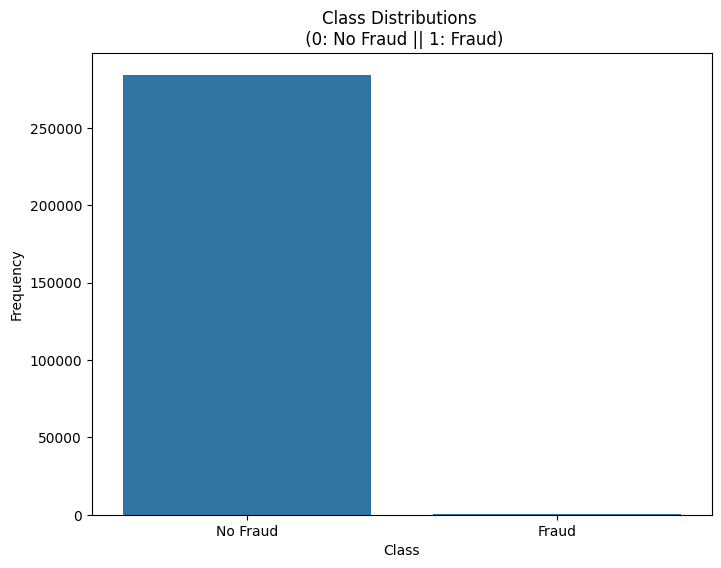

In [5]:

# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)')
plt.xticks([0, 1], ['No Fraud', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


In [6]:

# Calculate the percentage of fraudulent transactions
fraud_percentage = (class_distribution[1] / class_distribution.sum()) * 100
print(f"\nPercentage of fraudulent transactions: {fraud_percentage:.2f}%")



Percentage of fraudulent transactions: 0.17%


In [8]:
# Create a StandardScaler object
scaler = StandardScaler()

# Scale the 'Amount' and 'Time' columns
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original 'Time' and 'Amount' columns
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Display the first 5 rows with the new scaled columns
print("Data after scaling 'Time' and 'Amount':")
print(df.head())

Data after scaling 'Time' and 'Amount':
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       

In [9]:
# X contains all columns except for the 'Class' column (our target)
X = df.drop('Class', axis=1)
# y contains only the 'Class' column
y = df['Class']

print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

Shape of X (features): (284807, 30)
Shape of y (target): (284807,)


In [12]:
# Split the data into 80% training and 20% testing
# `stratify=y` is crucial here. It ensures that the proportion of fraud to non-fraud
# transactions is the same in both the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split into training and testing sets.")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Data split into training and testing sets.
Training set shape: (227845, 30)
Testing set shape: (56962, 30)


In [13]:
# Create the model instance with the crucial `class_weight` parameter
# `solver='liblinear'` is a good choice for this dataset.
model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)

# Train the model on the training data
print("Training the Logistic Regression model...")
model.fit(X_train, y_train)
print("Model training complete.")

Training the Logistic Regression model...
Model training complete.


In [15]:
y_pred = model.predict(X_test)

print("Predictions made on the test set.")

Predictions made on the test set.


In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9755


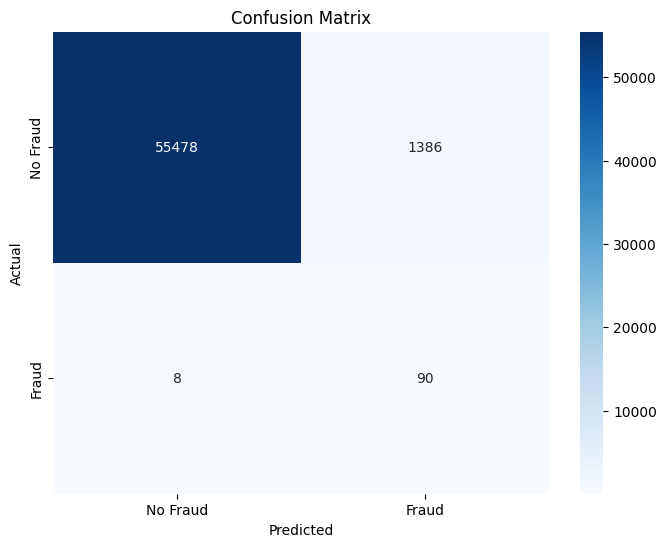

In [17]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [18]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Fraud', 'Fraud']))

Classification Report:
              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     56864
       Fraud       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

